In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [92]:
data=pd.read_csv("vehicle_data.csv")

C:\Users\mikaz\AppData\Local\Temp\ipykernel_16700\2450100322.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("vehicle_data.csv")


# Data Cleaning Phrase

Dropping unused columns.

In [4]:
data.drop(['Title', 'Sub_title', 'Edition', 'Description', 'Post_URL', 'Seller_name', 'Seller_type',
       'published_date'],axis=1,inplace=True)

Removing Whitespaces

In [6]:
for x in data.columns:
    if data.dtypes[x]!=('int64'):
        data[x]=data[x].str.strip()

Removing characters containing in 'Int' columns

In [7]:
data['Price'] = data['Price'].str.replace('\D', '',regex=True)
data['Mileage'] = data['Mileage'].str.replace('\D', '',regex=True)


Dropping Null values

In [ ]:
for x in data.columns:
    data[x].replace('',np.nan,inplace=True)
    data.dropna(subset=[x],inplace=True)

Changing Data Type

In [8]:
data['Mileage']=data['Mileage'].astype('int64')
data['Price']=data['Price'].astype('int64')

Removing Outliers

In [13]:
upper_limit=data.Price.mean()+3*data.Price.std()
lower_limit=data.Price.mean()-3*data.Price.std()

38664802.84351611

In [22]:
data1=data.loc[(data['Price']>lower_limit)&(data['Price']<upper_limit)]

Detecting Annormalies

In [27]:
data1.loc[data1['Brand']=='Ashok-Leyland']

,Price,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location
107202,1780000,Ashok-Leyland,DOST LS,2017,Used,Manual,Cab,Diesel,2500,38000,Embilipitiya


In [25]:
data1.nlargest(10,'Year')

,Price,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location
96345,6400000,Suzuki,Wagon R Stingray Turbo,2561,Used,Automatic,Car,Petrol,650,21525,Kandy
41871,400000,Peugeot,104,2022,Used,Manual,Hatchback,Petrol,"1,000 cc",100000,"Piliyandala, Colombo"
45584,10575000,DFSK,Glory,2022,New,Tiptronic,SUV / 4x4,Petrol,"1,498 cc",0,"Kohuwala, Colombo"
45593,9775000,DFSK,Glory,2022,Reconditioned,Tiptronic,SUV / 4x4,Petrol,"1,498 cc",4000,"Kohuwala, Colombo"
49670,13500000,DFSK,Glory,2022,New,Automatic,SUV / 4x4,Petrol,"1,500 cc",0,"Kotte, Colombo"
53279,13500000,DFSK,Glory,2022,New,Automatic,SUV / 4x4,Petrol,"1,500 cc",0,"Kotte, Colombo"
53977,10700000,DFSK,Glory,2022,New,Tiptronic,SUV / 4x4,Petrol,"1,498 cc",0,"Kohuwala, Colombo"
379,13500000,DFSK,Glory,2021,Used,Automatic,SUV / 4x4,Petrol,"1,500 cc",90,"Kandy City, Kandy"
1041,10690000,DFSK,Glory,2021,Used,Automatic,Hatchback,Petrol,"1,500 cc",1923,"Nugegoda, Colombo"
1292,12850000,DFSK,Glory,2021,Used,Tiptronic,SUV / 4x4,Petrol,"1,500 cc",600,"Dehiwala, Colombo"


Removing Annomalies

In [28]:
data1.drop(107202,inplace=True)

C:\Users\mikaz\AppData\Local\Temp\ipykernel_16700\3032618859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(107202,inplace=True)


In [95]:
data1.drop(96345,inplace=True)


C:\Users\mikaz\AppData\Local\Temp\ipykernel_16700\2638466097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(96345,inplace=True)


Removing unused vehicle rows

In [94]:
list1=['Motorbike','Unregistered','Bus','Other','Brand','Tractor','Heavy-Duty','Pickup','Three Wheel','Lorry']
data=data.loc[~(data['Body'].isin(list1))]

# Data Visualization

In [90]:
vehicle_type_name_list=['Car','Hatchback','Saloon','SUV / 4x4','Van','SUV','Station wagon','MPV','CoupÃ©/Sports','Wagon','Convertible','Cab']


Car Price Comparison


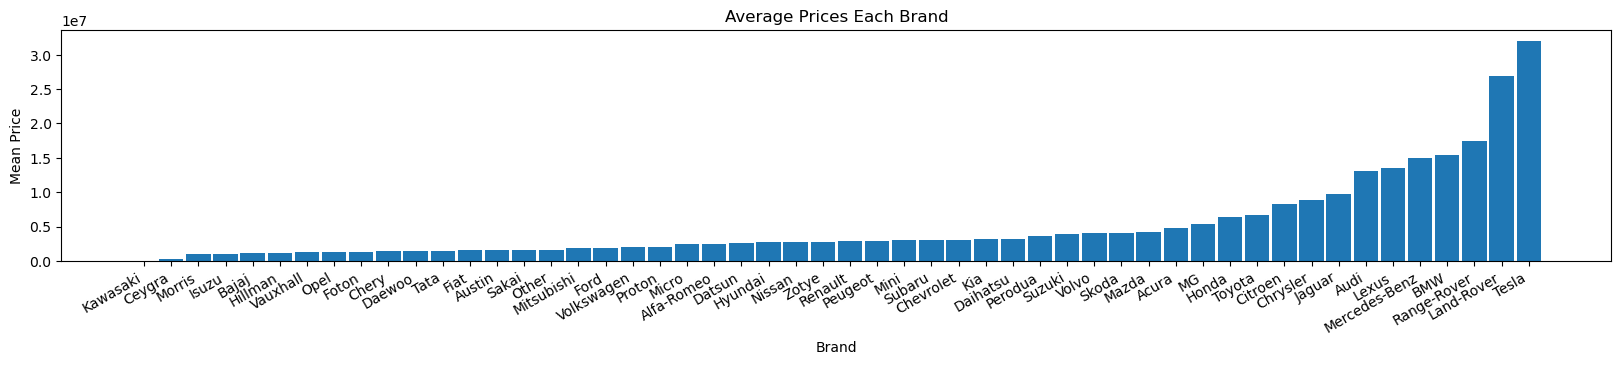

Hatchback Price Comparison


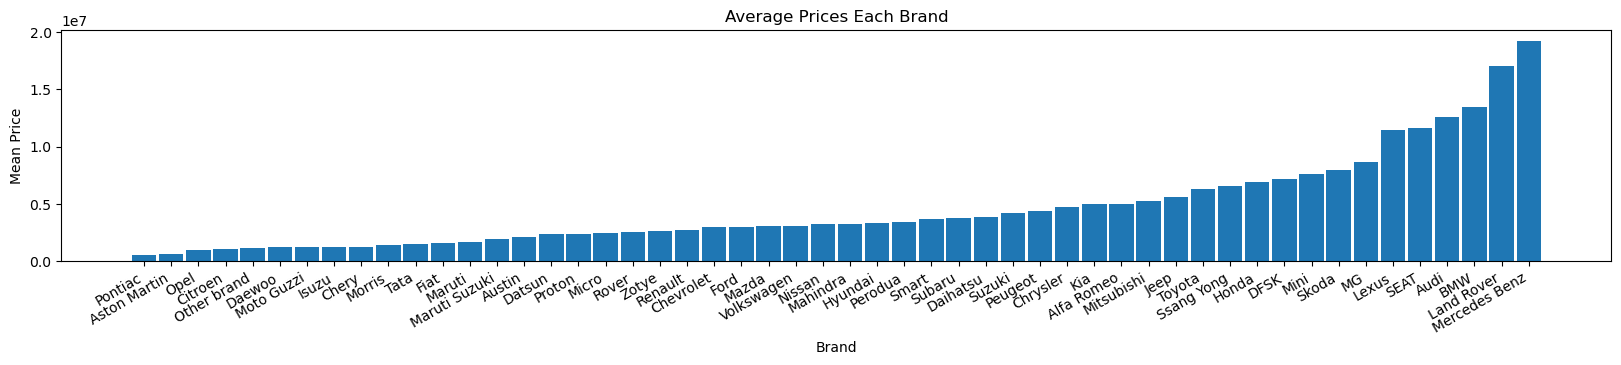

Saloon Price Comparison


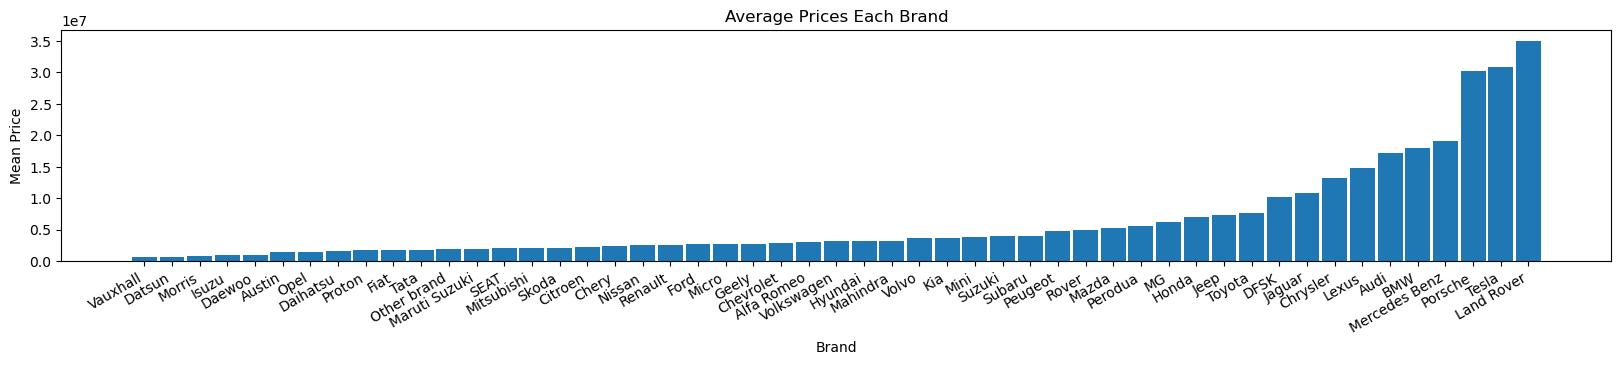

SUV / 4x4 Price Comparison


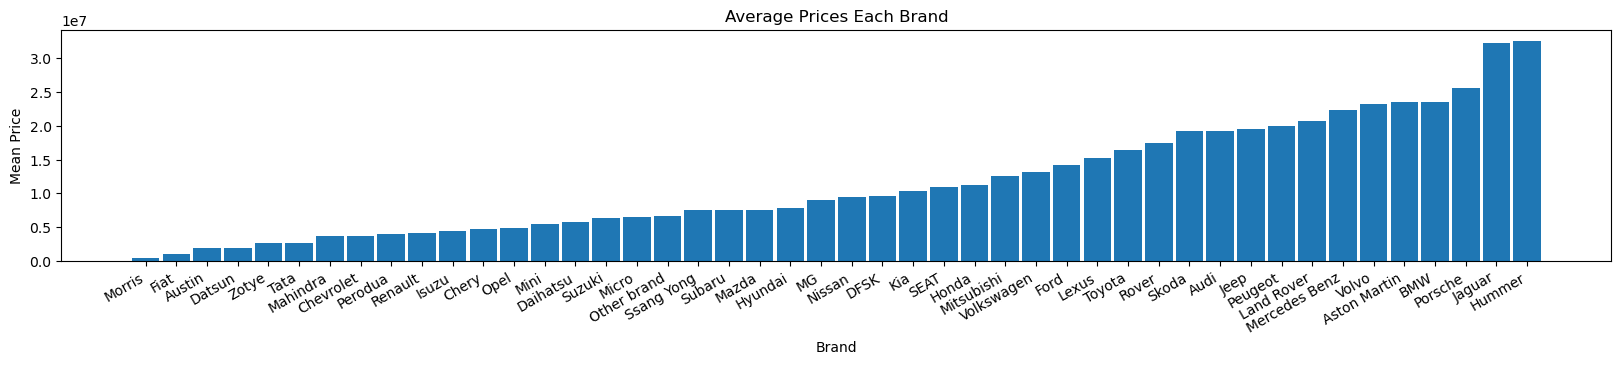

Van Price Comparison


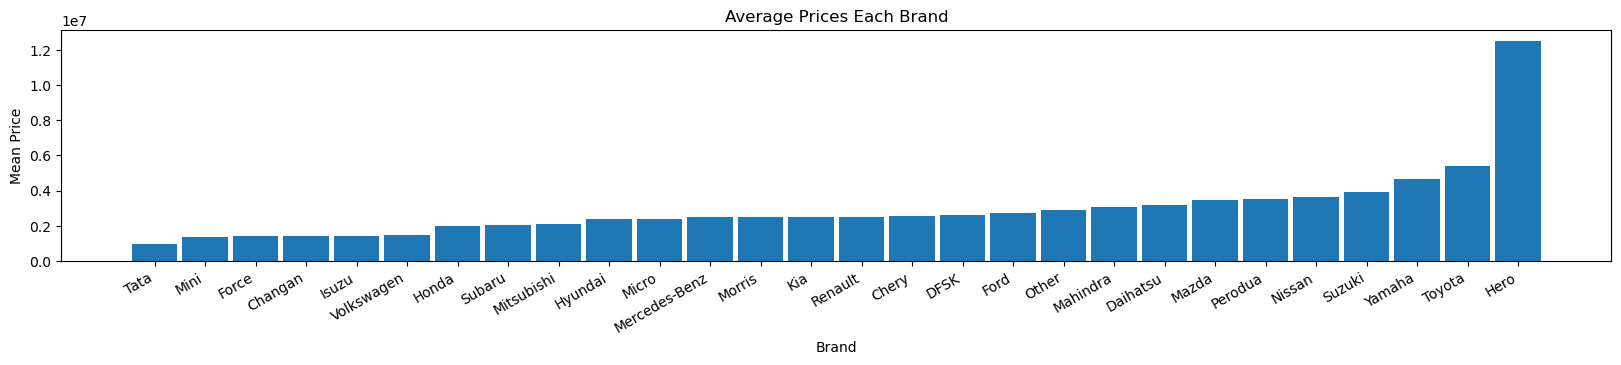

SUV Price Comparison


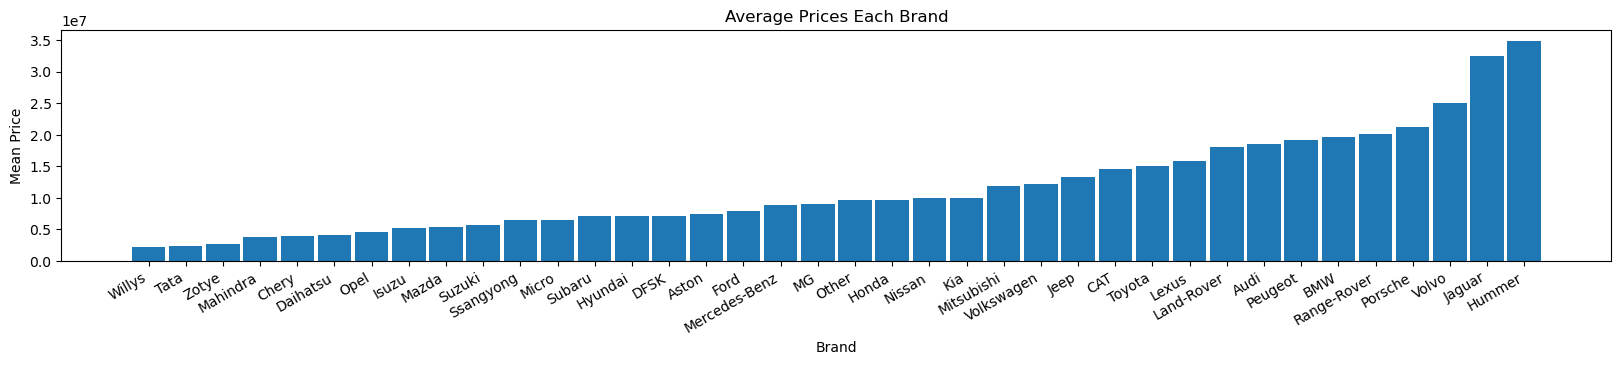

Station wagon Price Comparison


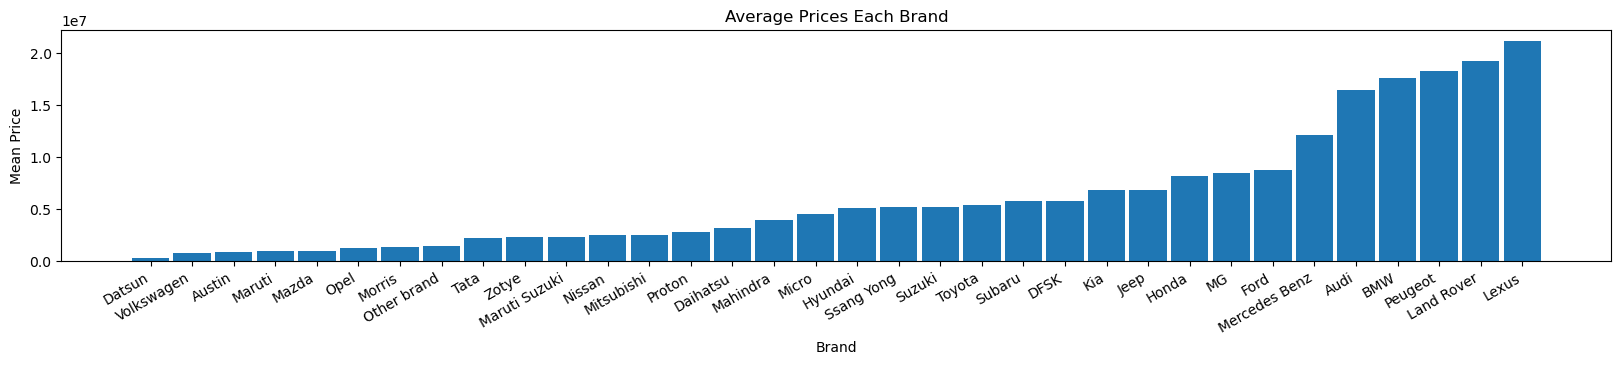

MPV Price Comparison


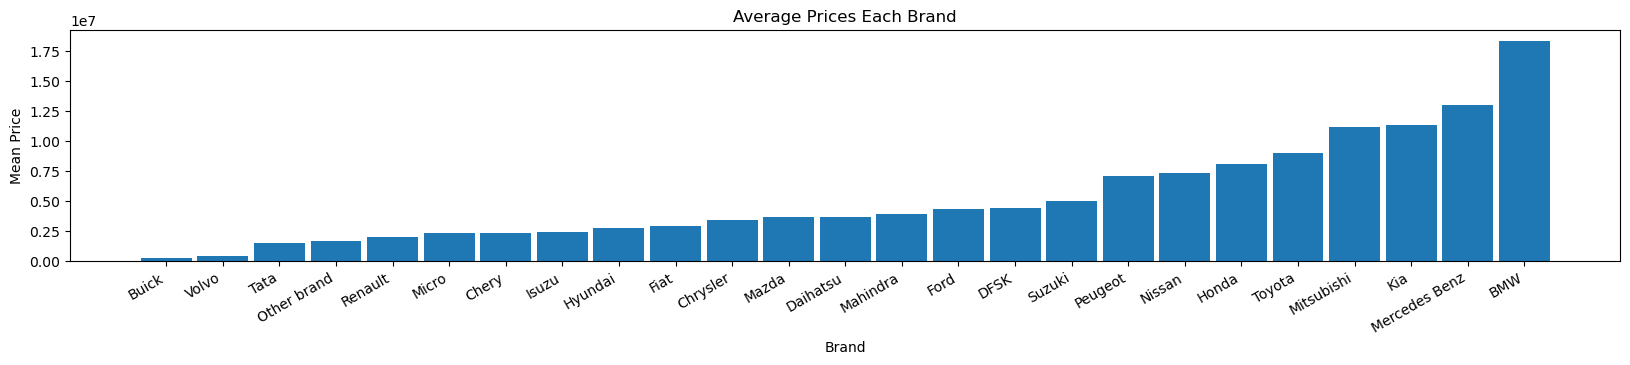

CoupÃ©/Sports Price Comparison


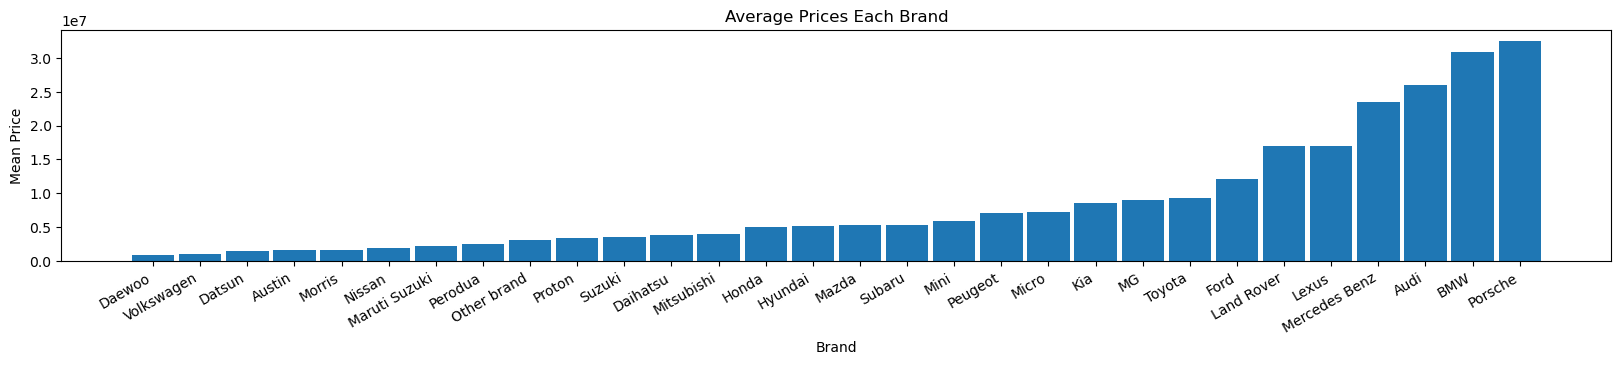

Wagon Price Comparison


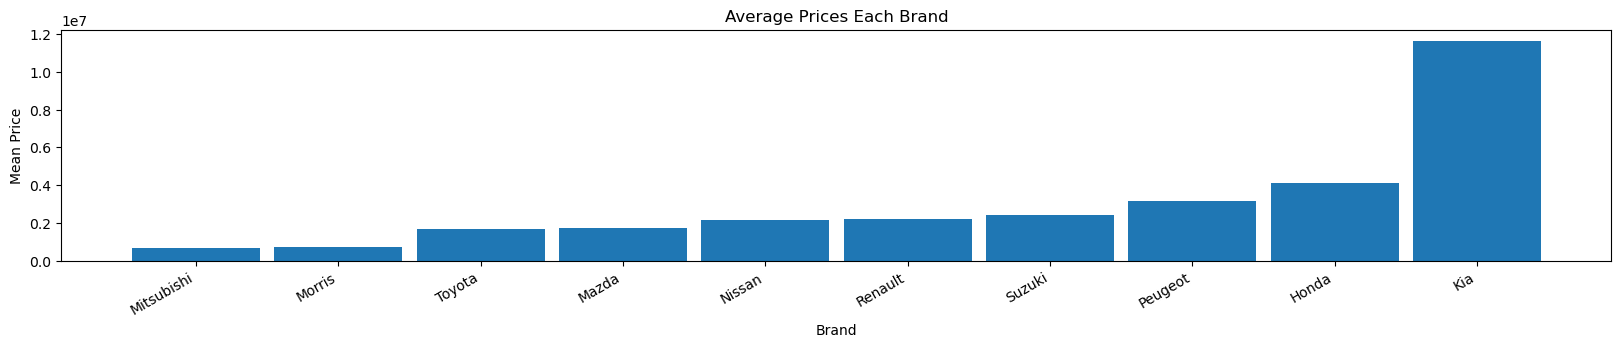

Convertible Price Comparison


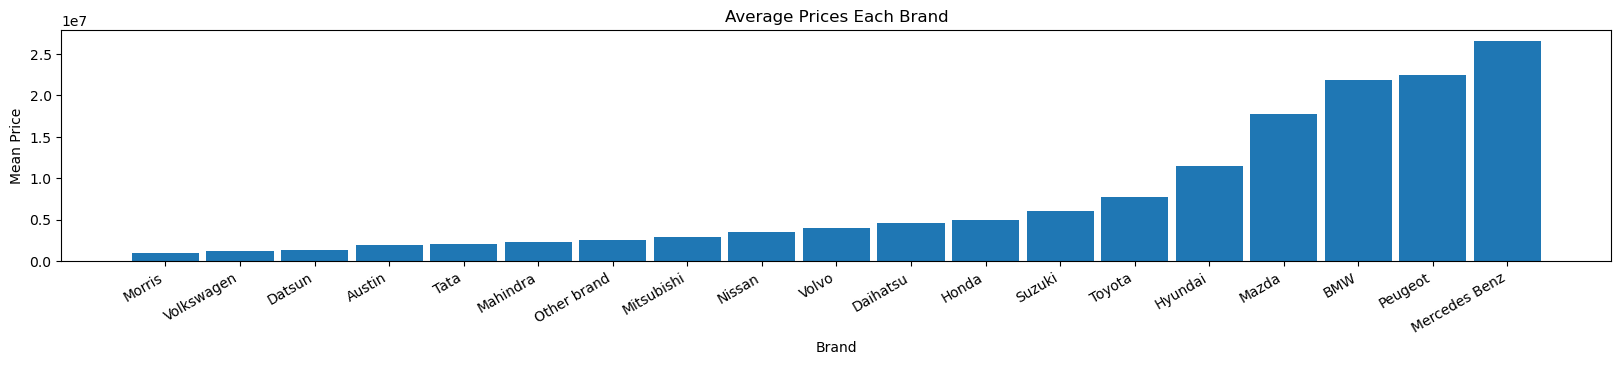

Cab Price Comparison


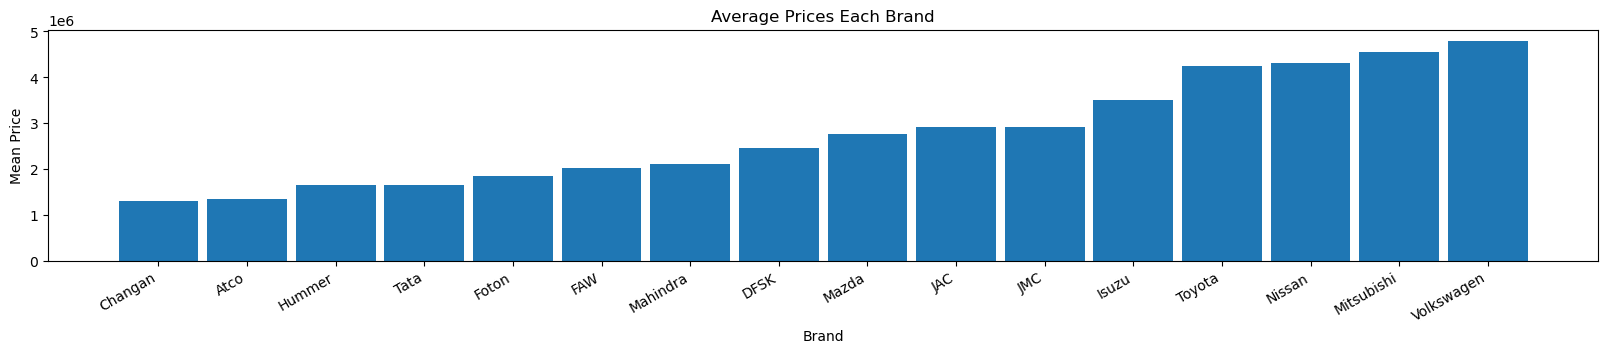

In [91]:
for x in vehicle_type_name_list:
    xl=data1.loc[data1['Body']==x]
    x_list=xl.groupby('Brand')['Price'].mean().sort_values()
    plt.figure(figsize=(20, 3))  # width:20, height:3
    plt.bar(x_list.index, x_list.values, width=.9)
    plt.xticks(rotation=30,ha='right')
    plt.title('Average Prices Each Brand')
    plt.xlabel('Brand')
    plt.ylabel('Mean Price')
    print(x,'Price Comparison')
    plt.show()